# Build your own CNN
- Recap

- Data prep

- Building a first CNN
    - Demo
    - Your turn

- Dropout
    - Demo
    - Your turn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import random as rn

seed = 42
np.random.seed(seed)
rn.seed(seed)
tf.set_random_seed(seed)

### Data ingestion and formatting

In [3]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2,random_state=seed)

In [4]:
X_train.shape

(48000, 28, 28)

### reshape data to fit model

In [5]:
# the models expects information about the channels used
# reshape data to fit model
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
X_train.shape

(48000, 28, 28, 1)

### EDA

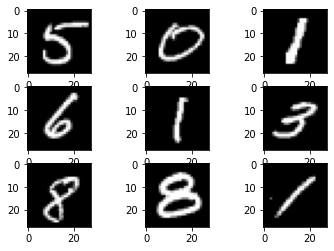

In [7]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
y_train[:10]

array([5, 0, 1, 6, 1, 3, 8, 8, 1, 8], dtype=uint8)

### one-hot encode target column

In [9]:
from keras.utils import to_categorical

# one-hot encode target column
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(48000, 10)

In [11]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [12]:
for i in range(0, 9):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# CNNs best practices

## Convolutional layers
Use small kernels/filters:
 - 3x3 or 5x5<br>
 
Use small strides:
 
 - 1 or 2 respectively for the above kernels
 - In general: Strides = (Kernel size -1)/2
 
 #### Discuss:
 How does the shape of our data change after applying a 3x3 convolutional layer with stride 1?
 
 
## Pooling layers
Downsampling of Convolutional output<br>

Use small kernels/filters:
 - 2x2
 - Sometimes you may want to use 3x3 but larger tends to reduce performance heavily<br>
 
Use small strides:
 
 - 2
 - Very rarely 3
 
 #### Discuss:
 By how much do we reduce our data size when we perform a 2x2 pooling of stride 2?


## Flattening layers
- Transform multidimensional data into in the NN into an array that can be used by a Dense Layer
- The nexus between your non-fully-connected and fully-connected layers

# Demo

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout

In [14]:
# Intitialise your NN
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(28,28,1),activation='relu'))
# Add a pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# Add a flattening layer
model.add(Flatten())
# Add a dense layer suitable for our problem
model.add(Dense(10,activation='softmax'))
# Compile your CNN
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# Show summary and compare with your partner
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit / Validate your model (Keep Epochs to 5 for our example)
history = model.fit(X_train,y_train,batch_size=1000,epochs=5,validation_data=(X_val, y_val),workers=-1)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 215us/step - loss: 6.3380 - accuracy: 0.7669 - val_loss: 1.2727 - val_accuracy: 0.9151
Epoch 2/5
48000/48000 [==============================] - 10s 202us/step - loss: 0.8298 - accuracy: 0.9331 - val_loss: 0.5841 - val_accuracy: 0.9445
Epoch 3/5
48000/48000 [==============================] - 9s 193us/step - loss: 0.3981 - accuracy: 0.9544 - val_loss: 0.3976 - val_accuracy: 0.9555
Epoch 4/5
48000/48000 [==============================] - 9s 197us/step - loss: 0.2535 - accuracy: 0.9654 - val_loss: 0.3341 - val_accuracy: 0.9584
Epoch 5/5
48000/48000 [==============================] - 9s 194us/step - loss: 0.1801 - accuracy: 0.9718 - val_loss: 0.2764 - val_accuracy: 0.9641


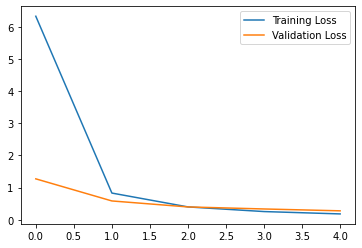

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Wait what?!!

# [But mum... Why is the training loss higher than the validation loss???!!!](https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss)

# Looking at outputs

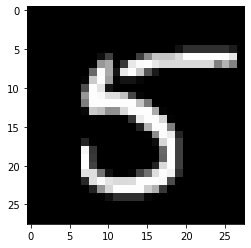

In [17]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))

In [18]:
model.predict(X_train[:1])

array([[0.0000000e+00, 0.0000000e+00, 4.0836412e-32, 3.6750786e-23,
        6.2750543e-38, 1.0000000e+00, 3.7837143e-33, 1.9594064e-38,
        2.0377183e-14, 1.3016040e-19]], dtype=float32)

In [19]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)

In [20]:
intermediate_output[0].shape

(13, 13, 32)

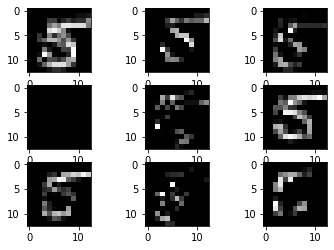

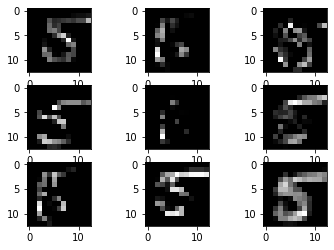

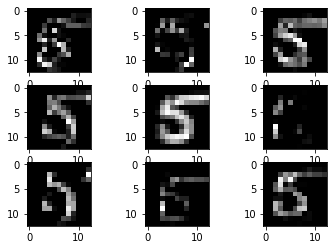

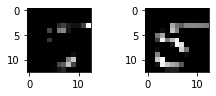

In [21]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(10,19):
    plt.subplot(330 + 1 + i-10)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(20,29):
    plt.subplot(330 + 1 + i-20)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(30,32):
    plt.subplot(330 + 1 + i-30)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()

## 1 Convolutional layer + 1 Pooling layer

In [22]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 16s 343us/step - loss: 6.7311 - accuracy: 0.7854 - val_loss: 0.8482 - val_accuracy: 0.9297
Epoch 2/5
48000/48000 [==============================] - 16s 330us/step - loss: 0.5388 - accuracy: 0.9449 - val_loss: 0.3728 - val_accuracy: 0.9565
Epoch 3/5
48000/48000 [==============================] - 15s 317us/step - loss: 0.2422 - accuracy: 0.9645 - val_loss: 0.2524 - val_accuracy: 0.9618
Epoch 4/5
48000/48000 [==============================] - 16s 329us/step - loss: 0.1424 - accuracy: 0.9746 - val_loss: 0.1890 - val_accuracy: 0.9680
Epoch 5/5
48000/48000 [==============================] - 16s 328us/step - loss: 0.0950 - accuracy: 0.9804 - val_loss: 0.1543 - val_accuracy: 0.9712


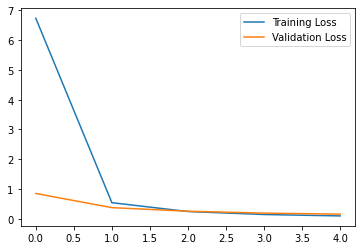

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Now build your CNN

#### Person A:
Output layer one 64 neurons, kernel 3x3<br>
Layer two kernel 2x2
#### Person B:
Output layer one 64 neurons, kernel 5x5<br>
Layer two kernel 2x2

In [25]:
# Intitialise your NN
# Add a convolutional layer
# Add a pooling layer
# Add a flattening layer
# Add a dense layer suitable for our problem
# Compile your CNN
# Show summary and compare with your partner

In [26]:
# Fit / Validate your model (Keep Epochs to 5 for our example)

## 2 Convolutional layer + 2 Pooling layer

In [27]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 24s 500us/step - loss: 4.0469 - accuracy: 0.6459 - val_loss: 0.5929 - val_accuracy: 0.8709
Epoch 2/5
48000/48000 [==============================] - 23s 487us/step - loss: 0.4204 - accuracy: 0.9010 - val_loss: 0.3049 - val_accuracy: 0.9190
Epoch 3/5
48000/48000 [==============================] - 23s 487us/step - loss: 0.2507 - accuracy: 0.9339 - val_loss: 0.2160 - val_accuracy: 0.9407
Epoch 4/5
48000/48000 [==============================] - 24s 495us/step - loss: 0.1810 - accuracy: 0.9500 - val_loss: 0.1718 - val_accuracy: 0.9534
Epoch 5/5
48000/48000 [==============================] - 24s 499us/step - loss: 0.1395 - accuracy: 0.9600 - val_loss: 0.1450 - val_accuracy: 0.9603


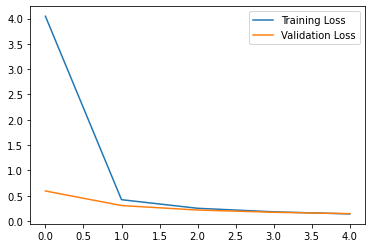

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 2 Convolutional layers

In [30]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 51s 1ms/step - loss: 2.2289 - accuracy: 0.8176 - val_loss: 0.1420 - val_accuracy: 0.9557
Epoch 2/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0997 - accuracy: 0.9697 - val_loss: 0.0919 - val_accuracy: 0.9715
Epoch 3/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0553 - accuracy: 0.9838 - val_loss: 0.0810 - val_accuracy: 0.9744
Epoch 4/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0348 - accuracy: 0.9901 - val_loss: 0.0773 - val_accuracy: 0.9760
Epoch 5/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.0815 - val_accuracy: 0.9762


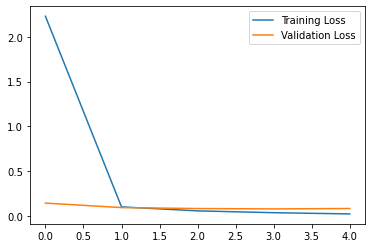

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 7 Convolutional layers

### Deeper networks tend to generalise better

## Dropout layers
Use small dropout values:
 - 20-50%<br>
 
Can be used on the visible and hidden layers
 
 #### Discuss:
 How does the shape of our data change after applying a dropout layer?

In [33]:
#create model
model = Sequential()

#add model layers
model.add(Dropout(0.2, input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)         

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 34s 703us/step - loss: 7.1777 - accuracy: 0.3535 - val_loss: 1.2094 - val_accuracy: 0.6443
Epoch 2/5
48000/48000 [==============================] - 33s 683us/step - loss: 1.0895 - accuracy: 0.6599 - val_loss: 0.5041 - val_accuracy: 0.8493
Epoch 3/5
48000/48000 [==============================] - 33s 693us/step - loss: 0.5968 - accuracy: 0.8202 - val_loss: 0.2898 - val_accuracy: 0.9118
Epoch 4/5
48000/48000 [==============================] - 33s 689us/step - loss: 0.4166 - accuracy: 0.8754 - val_loss: 0.2237 - val_accuracy: 0.9327
Epoch 5/5
48000/48000 [==============================] - 33s 689us/step - loss: 0.3301 - accuracy: 0.8991 - val_loss: 0.1767 - val_accuracy: 0.9462


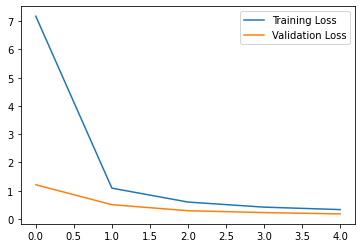

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

In [37]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# preds = model.predict(x)
# # decode the results into a list of tuples (class, description, probability)
# # (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=3)[0])

In [38]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________